In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['Brown-Headed Barbet','Buffalo','butterfly','cat','Cattle Egret','chicken','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','deer','dog','elephant','Forest Wagtail','fox','gharial','Gray Wagtail','Green Bee-Eater','Hoopoe','horse','House Crow','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','Jungle Babbler','kangaroo','leopard','lion','Northern Lapwing','pangolin','Peacock','Python','Red-Wattled Lapwing','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','Sarus Crane','shark','sheep','spider','tiger','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:02<00:00, 534.62it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.12it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=1000)

Epoch 1/1000
456/456 [==============================] - 19s 23ms/step - loss: 3.2499 - accuracy: 0.1477
Epoch 2/1000
456/456 [==============================] - 10s 22ms/step - loss: 2.5373 - accuracy: 0.3220
Epoch 3/1000
456/456 [==============================] - 10s 22ms/step - loss: 2.1495 - accuracy: 0.4163
Epoch 4/1000
456/456 [==============================] - 10s 22ms/step - loss: 1.8857 - accuracy: 0.4807
Epoch 5/1000
456/456 [==============================] - 10s 22ms/step - loss: 1.6885 - accuracy: 0.5318
Epoch 6/1000
456/456 [==============================] - 10s 23ms/step - loss: 1.5402 - accuracy: 0.5699
Epoch 7/1000
456/456 [==============================] - 10s 23ms/step - loss: 1.4084 - accuracy: 0.6050
Epoch 8/1000
456/456 [==============================] - 10s 23ms/step - loss: 1.2981 - accuracy: 0.6356
Epoch 9/1000
456/456 [==============================] - 10s 23ms/step - loss: 1.2085 - accuracy: 0.6590
Epoch 10/1000
456/456 [==============================] - 10s 23m

456/456 [==============================] - 10s 23ms/step - loss: 0.3289 - accuracy: 0.9175
Epoch 80/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3300 - accuracy: 0.9160
Epoch 81/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3357 - accuracy: 0.9162
Epoch 82/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3214 - accuracy: 0.9188
Epoch 83/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3315 - accuracy: 0.9164
Epoch 84/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3457 - accuracy: 0.9151
Epoch 85/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3289 - accuracy: 0.9179
Epoch 86/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3166 - accuracy: 0.9209
Epoch 87/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3284 - accuracy: 0.9187
Epoch 88/1000
456/456 [==============================] - 10s 23ms/ste

456/456 [==============================] - 10s 23ms/step - loss: 0.2657 - accuracy: 0.9466
Epoch 234/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.2907 - accuracy: 0.9412
Epoch 235/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.2908 - accuracy: 0.9408
Epoch 236/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.2833 - accuracy: 0.9425
Epoch 237/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.2751 - accuracy: 0.9431
Epoch 238/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.2794 - accuracy: 0.9444
Epoch 239/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3053 - accuracy: 0.9387
Epoch 240/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3739 - accuracy: 0.9257
Epoch 241/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.2951 - accuracy: 0.9408
Epoch 242/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 23ms/step - loss: 0.4747 - accuracy: 0.9061
Epoch 388/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.3482 - accuracy: 0.9344
Epoch 389/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.2898 - accuracy: 0.9451
Epoch 390/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.3194 - accuracy: 0.9399
Epoch 391/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.3557 - accuracy: 0.9347
Epoch 392/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.3731 - accuracy: 0.9318
Epoch 393/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3158 - accuracy: 0.9428
Epoch 394/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.3045 - accuracy: 0.9433
Epoch 395/1000
456/456 [==============================] - 10s 22ms/step - loss: 0.3820 - accuracy: 0.9320
Epoch 396/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 23ms/step - loss: 0.4829 - accuracy: 0.9082
Epoch 542/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.4824 - accuracy: 0.9164
Epoch 543/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.4821 - accuracy: 0.9104
Epoch 544/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.3603 - accuracy: 0.9345
Epoch 545/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.4044 - accuracy: 0.9294
Epoch 546/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.4789 - accuracy: 0.9211
Epoch 547/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.5420 - accuracy: 0.9036
Epoch 548/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.7829 - accuracy: 0.8501
Epoch 549/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.6213 - accuracy: 0.8865
Epoch 550/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 23ms/step - loss: 0.6340 - accuracy: 0.8883
Epoch 696/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.7999 - accuracy: 0.8687
Epoch 697/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.5306 - accuracy: 0.9069
Epoch 698/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.7163 - accuracy: 0.8648
Epoch 699/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.5844 - accuracy: 0.9024
Epoch 700/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.4542 - accuracy: 0.9175
Epoch 701/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.4865 - accuracy: 0.9143
Epoch 702/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.6646 - accuracy: 0.8766
Epoch 703/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.6773 - accuracy: 0.8943
Epoch 704/1000
456/456 [==============================] - 10s

456/456 [==============================] - 10s 23ms/step - loss: 1.1235 - accuracy: 0.8096
Epoch 850/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.9182 - accuracy: 0.8325
Epoch 851/1000
456/456 [==============================] - 10s 23ms/step - loss: 1.5221 - accuracy: 0.7392
Epoch 852/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.8325 - accuracy: 0.8427
Epoch 853/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.9405 - accuracy: 0.8346
Epoch 854/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.7295 - accuracy: 0.8664
Epoch 855/1000
456/456 [==============================] - 10s 23ms/step - loss: 1.2320 - accuracy: 0.7796
Epoch 856/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.9515 - accuracy: 0.8326
Epoch 857/1000
456/456 [==============================] - 10s 23ms/step - loss: 0.8079 - accuracy: 0.8529
Epoch 858/1000
456/456 [==============================] - 10s

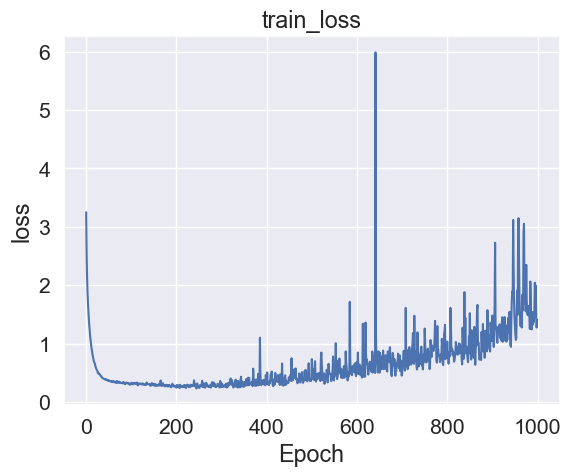

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 0s 8ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.5354058721934369


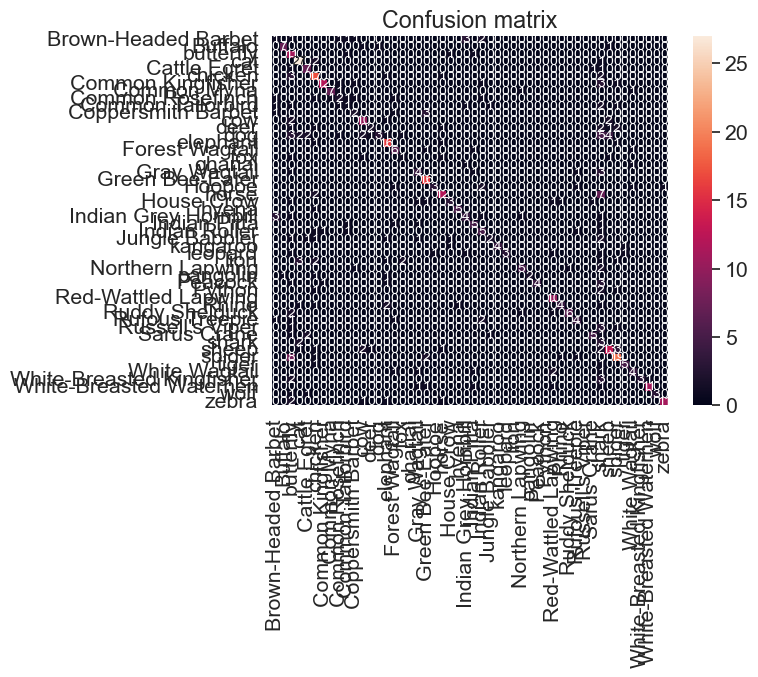

In [12]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [13]:
'存模型&讀模型'
from keras.models import load_model
model.save("problem_retry_04_model")

INFO:tensorflow:Assets written to: problem_retry_04_model\assets


INFO:tensorflow:Assets written to: problem_retry_04_model\assets
